## Audio Widgets

**Dates:**   
17/05/2021, 20/09/2021, 21/09/2021, 27/09/2022   
31/10/2023: verified with v0.8.0

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display, clear_output, Audio, HTML
import ipywidgets as widgets
import numpy as np
import time
import librosa

import IPython
Audio_args = {'normalize':False}

import pyspch.core as Spch
import pyspch.sp as Sps
import pyspch.display as Spd

## Loading, Playing, Time based Stopping Audio

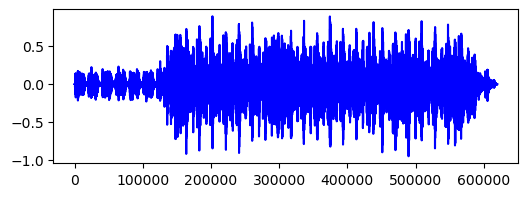

In [3]:
SAMPLE_WAV_URL = 'https://homes.esat.kuleuven.be/~spchlab/data/misc/train.wav'
SAMPLE_WAV_URL = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/Psnger22.wav'
#
wavdata,sr= Spch.audio.load(SAMPLE_WAV_URL) 
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
display(Audio(data=wavdata,rate=sr,autoplay=False,**Audio_args))

In [4]:
Spch.audio.play(wavdata,sr,wait=False)
time.sleep(3)
Spch.audio.stop()

In [7]:
# you can  style the audio widget

#/* Example: */
#audio {
#  display: /*...*/,
#  border: /*...*/,
#  padding: /*...*/,
#  margin: /*...*/,
#}

# this is difficult to manage as you can only have one such statement in the full
# notebook and it changes the layout of all such audio buttons  in the notebook
#
audio_style = "<style>audio { margin-left: 5px; width: 50%; height:100% }</style>" 
display(HTML(audio_style))
display(Audio(data=wavdata,rate=sr,autoplay=False,**Audio_args))

## Widgets for an AudioPlayer

In [8]:
# A miniplayer with or without logscreen
Spd.MiniPlayer(data=wavdata,sample_rate=sr)

MiniPlayer(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bor…

In [9]:
Player2 = Spd.MiniPlayer(data=wavdata,sample_rate=sr,logscr=True)
display(Player2)

MiniPlayer(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bor…

In [22]:
## code below is experimental and was used to develop the Spd.MiniPlayer()

In [12]:
Symbols = { 'play':'\u25b6','reverse':'\u25C0' , 'pause':'\u23F8', 'stop': '\u23F9', 'record':'\u2b55'}
def box_layout(width='',padding='1px',margin='1px',border=''):
     return widgets.Layout(
        border= border,
        padding = padding,      # padding='2px 2px 2px 2px',    white space inside: top, right, bottom, left
        margin=   margin,       # margin = '1px 1px 1px 1px',   white space around the outside
        width = width
     )
def button_layout():
    return widgets.Layout(
        border='solid 1px black',
        margin='5px 5px 5px 5px',
        padding='5px 5px 5px 5px',
        width = '50px',
        height = '40px',
        flex_shrink =2
     )

class PlayPauseButton(widgets.HBox):
    def __init__(self,data,sample_rate=8000,width=None,border='',logscr=False):
        super().__init__()
        self.data = data
        self.sample_rate = sample_rate
        self.wg_play_button = widgets.Button(description=Symbols['play'],layout=button_layout())
        self.wg_pause_button = widgets.Button(description=Symbols['pause'],layout=button_layout())
        
        self.wg_play_box = widgets.VBox([self.wg_play_button])
        self.wg_pause_box = widgets.VBox([self.wg_pause_button])
           
        self.wg_play_button.on_click(self.play_sound)
        self.wg_pause_button.on_click(self.pause_sound) 
        if width is not None:
            if logscr: width = '500px'
            else: width = '125px'
        self.layout= box_layout(width=width,border=border)
        self.logscr = widgets.Output(layout=box_layout(border='1px solid blue'))
        if logscr:
            self.children = [self.wg_play_box,self.wg_pause_box,self.logscr]
        else:
            self.children = [self.wg_play_box,self.wg_pause_box]              
        
    def play_sound(self,b):
        with self.logscr:
            print("Playing")
        Spch.audio.play(self.data,sample_rate=self.sample_rate,wait=False)
            
    def pause_sound(self,b):
        with self.logscr:
            print("Stop Playing")
        Spch.audio.stop()

In [13]:
play_pause_button = PlayPauseButton(data=wavdata,sample_rate=sr,logscr=False) # ,border='solid black 2px')               
display(play_pause_button)

PlayPauseButton(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black'…

In [14]:
play_pause_button

PlayPauseButton(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black'…

In [15]:
# A more elaborate version in PlayButtonX
#
Symbols = { 'play':'\u25b6','reverse':'\u25C0' , 'pause':'\u23F8', 'stop': '\u23F9', 'record':'\u2b55'}
def box_layout(width='',padding='1px',margin='1px',border=''):
     return widgets.Layout(
        border= border,
        padding = padding,      # padding='2px 2px 2px 2px',    white space inside: top, right, bottom, left
        margin=   margin,       # margin = '1px 1px 1px 1px',   white space around the outside
        width = width
     )
def button_layout():
    return widgets.Layout(
        border='solid 1px black',
        margin='5px 5px 5px 5px',
        padding='5px 5px 5px 5px',
        width = '50px',
        height = '40px',
        flex_shrink =2
     )
def label_layout():
    return widgets.Layout(
        display="flex", 
        justify_content="center"
    )

class PlayButtonX(widgets.HBox):
    def __init__(self,data,sample_rate=8000,mode=1,width='50%',border='',Labels=False):
        super().__init__()
        self.data = data
        self.sample_rate = sample_rate
        self.wg_play_button = widgets.Button(description=Symbols['play'],layout=button_layout())
        self.wg_pause_button = widgets.Button(description=Symbols['pause'],layout=button_layout())
        if Labels:
            self.wg_play_box = widgets.VBox([self.wg_play_button,
                                          widgets.Label(value="PLAY", layout=label_layout())])        
            self.wg_pause_box = widgets.VBox([self.wg_pause_button,
                                          widgets.Label(value="PAUSE", layout=label_layout())])
        else: 
            self.wg_play_box = widgets.VBox([self.wg_play_button])
            self.wg_pause_box = widgets.VBox([self.wg_pause_button])
           
        self.wg_play_button.on_click(self.play_sound)
        self.wg_pause_button.on_click(self.pause_sound)    
        self.out = widgets.Output(layout=widgets.Layout(width='50%'))
        self.audio = widgets.Output()
        self.layout= box_layout(width=width,border=border)
        self.mode = mode
        
        with self.out:
            if mode ==0 :
                fig = None
            elif mode == 1:
                fig=Spd.PlotWaveform(self.data,sample_rate=self.sample_rate,xlabel=None,xticks=None,yticks=False,figsize=(10,5))
            elif mode ==2 :
                spg = Sps.spectrogram(self.data,sample_rate=self.sample_rate)
                fig=Spd.PlotSpg(spgdata=spg,sample_rate=self.sample_rate,figsize=(10,6))
                fig.axes[0].set_yticks([])
            elif mode ==3 :
                spg = Sps.spectrogram(self.data,sample_rate=self.sample_rate)
                fig=Spd.PlotSpg(wavdata=self.data,spgdata=spg,sample_rate=self.sample_rate,figsize=(10,6))
            display(fig)
        if mode == 0:
            self.children = [
                self.wg_play_box,
                self.wg_pause_box] #,self.out] 
        else: 
            self.children = [widgets.VBox([self.wg_play_button, self.wg_pause_button],layout=widgets.Layout(width='25%')), self.out] 
        
    def play_sound(self,b):
        with self.audio:
            #clear_output()
            #if(IN_COLAB):
            #  print("IN_COLAB: Use the HTML button to play sound")
            Spch.audio.play(self.data,sample_rate=self.sample_rate,wait=False)
        with self.out:
            clear_output()
            print("Push PAUSE button to stop")
            
    def pause_sound(self,b):
        with self.out:
            clear_output()
            print("Push PLAY button to start")
            Spch.audio.stop()

In [16]:
play_button_a=PlayButtonX(data=wavdata,sample_rate=sr,mode=0,Labels=True)                
display(play_button_a)

PlayButtonX(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bo…

In [17]:
play_button_b=PlayButtonX(data=wavdata,sample_rate=sr,mode=0,width='125px',Labels=False,border='2px solid black')                
display(play_button_b)

PlayButtonX(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bo…

In [18]:
pb1=PlayButtonX(data=wavdata,sample_rate=sr,mode=1,width='20%')
pb2=PlayButtonX(data=wavdata,sample_rate=sr,mode=2,width='40%')
pb3=PlayButtonX(data=wavdata,sample_rate=sr,mode=3,width='75%')
display( pb1, pb2, pb3)

PlayButtonX(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bo…

PlayButtonX(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bo…

PlayButtonX(children=(VBox(children=(Button(description='▶', layout=Layout(border_bottom='solid 1px black', bo…

In [20]:
wavlen = float(len(wavdata))/sr
play = widgets.Play(
    interval=100,
    value=0,
    min=0,
    max=20,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.FloatSlider(min=0.,max=20.)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [21]:
play

Play(value=0, description='Press play', max=20)

#### styling audio player tricks, 
see e.g.
https://css-tricks.com/lets-create-a-custom-audio-player/
... but it doesn't work in this notebook

code below needs extra styling ... but then without affecting the rest of the notebook

In [19]:
%%html

<div id="audio-player-container">
  <audio src="https://assets.codepen.io/4358584/Anitek_-_Komorebi.mp3" preload="metadata" loop></audio>
  <p>audio player ish</p>
  <button id="play-icon"></button>
  <span id="current-time" class="time">0:00</span>
  <input type="range" id="seek-slider" max="100" value="0">
  <span id="duration" class="time">0:00</span>
  <output id="volume-output">100</output>
  <input type="range" id="volume-slider" max="100" value="100">
  <button id="mute-icon"></button>
</div>
